# Exploratory Data Analysis

Exploratory data analysis (EDA) is the process of looking for patterns, differences, and other features within a dataset. We are trying to analyze our dataset to summarize its main characteristics.

EDA can be used to check your data for inconsistencies or identify limitations in the data, as well as identifying trends or outliers in the data.

EDA is often done visually, by creating plots, or numerically, by calculating **descriptive statistics**.

TODO: Add a section about categorical vs numeric vaiables. Talk about plots for categorical - frequency and relative frequency.

# Descriptive Statistics

**Goal:** Describe a data set in terms of its important features. Summarize a data set using a few numbers and/or a plot.

Ways to describe data:
* Shape
* Central Tendency
* Spread

## Shape

Symmetry/Skewness

Modality

# Measures of Central Tendency

Give a central or "typical" value of a data set.
The most common ones are the mean, median, and mode.

## Mean

Also known as the *average* or *arithmetic mean*. Defined as total (sum) of the values of a set of observations divided by the number of observations. When calculating the mean, the only difference between a sample and population mean is the notation.

$$\text{Sample Mean: } \bar{x} = \frac{x_1 + x_2 + \cdots + x_n}{n} = \frac{\sum\limits_{i=1}^n x_i}{n}$$

$$\text{Population Mean: } \mu = \frac{x_1 + x_2 + \cdots + x_n}{n} = \frac{\sum\limits_{i=1}^n x_i}{n}$$

Represents the “balance point” of the data. 

It is the amount that all observations would have if the total amount of the variable was evenly distributed to all observations.

In [31]:
import pandas as pd
%matplotlib inline

In [32]:
lakers = pd.read_csv('../data/Lakers.csv')

In [33]:
lakers

,player,salary,height_inches
0,LeBron James,37436858,80
1,Anthony Davis,27093019,82
2,Danny Green,14634146,78
3,Kentavious Caldwell-Pope,8089282,77
4,Avery Bradley,4767000,74
5,JaVale McGee,4000000,84
6,DeMarcus Cousins,3500000,83
7,Quinn Cook,3000000,74
8,Alex Caruso,2750000,77
9,Jared Dudley,2564753,79


In [34]:
print('Total Lakers\' payroll ', '${:,}'.format(lakers.salary.sum()))

Total Lakers' payroll  $117,866,068


In [35]:
lakers.salary.sum() / lakers.salary.count()

7857737.866666666

In [36]:
lakers.salary.mean()

7857737.866666666

This says that if we distributed the total payroll evenly to all players, they would each receive a salary of $7,857,737.

Notice that only 4 out of the 15 players made above the average, with the top three players making significantly higher than the average. This is typical for data sets where you have extreme observations.

## Outliers

This is probably a good place to mention outliers. They can be looked at again through different lenses later (eg. $z$-scores).

There is no precise definition of an "outlier", and it often depends on particular data set you a looking at and on applying some domain knowledge of the problem at hand.

## Median

The middle value if the data is arranged by size.

For an odd number of observations, the median will be a value from the data set.

For an odd number of observations, the median is the mean of the two centermost observations.

The median divides the dataset exactly in half. 

In our `lakers` dataset, we have 15 observations, which means that the 8th observation corresponds to the median. In this case, Quinn Cook, who has a salary of $3,000,000.

In [37]:
lakers.salary.median()

3000000.0

## Trimmed Mean

Another option to reduce the effect of outliers is to use a **trimmed mean**. To compute the trimmed mean, you can remove the largest and smallest *x*% of observations and then calculate the mean. Often, the largest and smallest 10% are removed. This is a compromise between the mean and the median, in that it still takes into account a large portion of the dataset, while being less influeced by extreme observations.

To calculate the trimmed mean, we can use the `trim_mean` function from the scipy stats module. To use this function, we need to pass in the data and specify the `proportiontocut` argument, as a decimal.

In [138]:
from scipy.stats import trim_mean

In [144]:
trim_mean(lakers.salary, proportiontocut=.1)

6117761.538461538

## Distribution Shape

Notice that the median is significantly lower than the mean. This is typical for skewed datasets.

A dataset is **skewed** if most of its elements are within a certain range, but there are some number of unusually high or unusually low observations.

We can detect skewness by plotting out the distribution of the dataset. 

Measures of central tendency can reveal asymmetries in our dataset.

### Histograms

A histogram shows how many observations lie within a certain class interval. That is, it divides the dataset into *bins*, and the height of the plot above each interval is proportional to the number of observations that fall within that bin.

Procedure:
* Separate data into equal-width, non-overlapping bins
* Count number of data points in each bin

Must decide how many bins to use. Rule of thumb: $\text{number of bins} = \sqrt{\text{sample size}}$

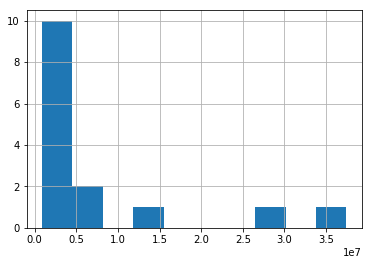

In [38]:
lakers.salary.hist();

Sometimes, you need to adjust the number of bins in order to get a clearer idea of the distribution of your dataset.

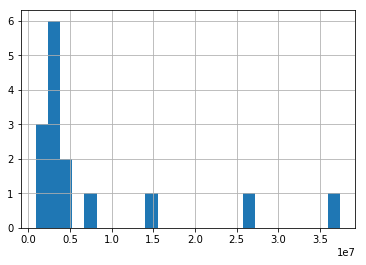

In [39]:
lakers.salary.hist(bins = 25);

For our Lakers salary dataset, we can see that there are a few unusually large observations. Another way to say this is that the dataset has a long tail to the right. When a dataset has a long tail to the right, we say that it is **right-skewed**. Analogously, a dataset with a long tail to the left (unusually small observations) would be said to be **left-skewed**.

# Measures of Spread

Give an idea of how similar or varied the observations in the dataset are. Typical measures: range, variance, and standard deviation.

## Range

The range measures how "wide" a dataset is. It depends only on the largest and smallest observations.

$$ \text{range} = \text{maximum observation} - \text{minimum observation}$$

In [136]:
lakers.nlargest(1, 'salary')

,player,salary,height_inches,deviation,squared_deviation,salary_z-score,height_z-score
0,LeBron James,37436858,80,2.957912e+07,8.749243e+14,2.877437,0.442963


In [137]:
lakers.nsmallest(1, 'salary')

,player,salary,height_inches,deviation,squared_deviation,salary_z-score,height_z-score
14,Talen Horton-Tucker,898310,76,-6.959428e+06,4.843364e+13,-0.677009,-0.712593


In [40]:
lakers.salary.max() - lakers.salary.min()

36538548

Notice that since the range only uses the largest and smallest observations, while ignoring all others, it is very sensitive to unusually large or small observations.

## Variance and Standard Deviation

The variance and standard deviation give an idea about how far, on average, observations are from the mean. The formula for variance and standard deviation differ depending on whether we are looking at the entire population or a sample.

$$\text{Population Variance: } \sigma^2 = \frac{\sum\limits_{i = 1}^n(x_i - \mu)^2}{n}$$

$$\text{Population Standard Deviation: } \sigma = \sqrt{\sigma^2} $$

$$\text{Sample Variance: } s^2 = \frac{\sum\limits_{i = 1}^n(x_i - \bar{x})^2}{n - 1}$$

$$\text{Sample Standard Deviation: } s = \sqrt{s^2} $$

Why the difference? When working with a sample, we divide by $n - 1$, that is, one less than the number of observations. Informally, the reason that we do this is that we are trying to approximate the population variance. We want to estimate the deviation from the mean, but at the same time, we don't know the true population mean to start with, only an estimate from the sample ($\bar{x}$). So we are making an estimate using an estimate. To compensate for this, we need to inflate our estimate of the variance slightly, by dividing by $n - 1$ instead of $n$.

Why do we have two measures - variance AND standard deviation? Notice that the units for the variance will be the squared original units.

By taking the square root, we are putting our measure back into the original units.

By default, most function that calculate the variance or standard deviation will assume that we are looking at a sample. However, in this case, we have the entire population, so we need to adjust it. If we are using `pandas` methods, we can specify `ddof = 0`, which sets the "delta degrees of freedom", or the amount that the "degrees of freedom" differ from the number of observations, to be 0.

In [41]:
lakers.salary.var(ddof = 0)

105671728309241.28

In [42]:
lakers.salary.std(ddof = 0)

10279675.496300517

In [43]:
lakers['deviation'] = lakers.salary - lakers.salary.mean()
lakers

,player,salary,height_inches,deviation
0,LeBron James,37436858,80,2.957912e+07
1,Anthony Davis,27093019,82,1.923528e+07
2,Danny Green,14634146,78,6.776408e+06
3,Kentavious Caldwell-Pope,8089282,77,2.315441e+05
4,Avery Bradley,4767000,74,-3.090738e+06
5,JaVale McGee,4000000,84,-3.857738e+06
6,DeMarcus Cousins,3500000,83,-4.357738e+06
7,Quinn Cook,3000000,74,-4.857738e+06
8,Alex Caruso,2750000,77,-5.107738e+06
9,Jared Dudley,2564753,79,-5.292985e+06


In [44]:
lakers['squared_deviation'] = lakers.deviation**2
lakers

,player,salary,height_inches,deviation,squared_deviation
0,LeBron James,37436858,80,2.957912e+07,8.749243e+14
1,Anthony Davis,27093019,82,1.923528e+07,3.699960e+14
2,Danny Green,14634146,78,6.776408e+06,4.591971e+13
3,Kentavious Caldwell-Pope,8089282,77,2.315441e+05,5.361269e+10
4,Avery Bradley,4767000,74,-3.090738e+06,9.552661e+12
5,JaVale McGee,4000000,84,-3.857738e+06,1.488214e+13
6,DeMarcus Cousins,3500000,83,-4.357738e+06,1.898988e+13
7,Quinn Cook,3000000,74,-4.857738e+06,2.359762e+13
8,Alex Caruso,2750000,77,-5.107738e+06,2.608899e+13
9,Jared Dudley,2564753,79,-5.292985e+06,2.801569e+13


In [45]:
lakers.squared_deviation.mean()

105671728309241.28

# Measures of Position

Measures of position have to do with ranking where an observation is in the dataset with respect to all other values.

## $z$-scores

A $z$-score measures the position of an observation, in terms of number of standard deviations from the mean. In some sense, it measures how "unusual" a particular observation is. It is unitless, which makes it easier to interpret in many cases. 

$$ z\text{-score} = \frac{\text{observation} - \bar{x}}{s^2}$$

A $z$-score of 1.4 says that an observation is 1.4 standard deviations larger than the average value, whereas a $z$-score of -2.8 says that an observation is 2.8 standard deviations lower than the mean.

If a dataset is reasonably close to normally-distributed (meaning that the histogram looks roughly bell-shaped), then it will be highly unusual for an observation to have a $z$-score with magnitude 3 or larger.

Warning about $z$-scores: Be careful when using $z$-scores for small datasets. The maximum $z$-score is limited to $\frac{n−1}{\sqrt{n}}$ For our dataset of 15 observations, the maximum $z$-score is $\frac{14}{\sqrt{15}} \approx 3.6$. 

Further complicating the situation when there are outliers is that an outlier can inflate the mean and standard deviation, especially for a small dataset.

In [46]:
lakers['salary_z-score'] = (lakers.salary - lakers.salary.mean()) / lakers.salary.std(ddof = 0)
lakers

,player,salary,height_inches,deviation,squared_deviation,salary_z-score
0,LeBron James,37436858,80,2.957912e+07,8.749243e+14,2.877437
1,Anthony Davis,27093019,82,1.923528e+07,3.699960e+14,1.871195
2,Danny Green,14634146,78,6.776408e+06,4.591971e+13,0.659204
3,Kentavious Caldwell-Pope,8089282,77,2.315441e+05,5.361269e+10,0.022524
4,Avery Bradley,4767000,74,-3.090738e+06,9.552661e+12,-0.300665
5,JaVale McGee,4000000,84,-3.857738e+06,1.488214e+13,-0.375278
6,DeMarcus Cousins,3500000,83,-4.357738e+06,1.898988e+13,-0.423918
7,Quinn Cook,3000000,74,-4.857738e+06,2.359762e+13,-0.472558
8,Alex Caruso,2750000,77,-5.107738e+06,2.608899e+13,-0.496877
9,Jared Dudley,2564753,79,-5.292985e+06,2.801569e+13,-0.514898


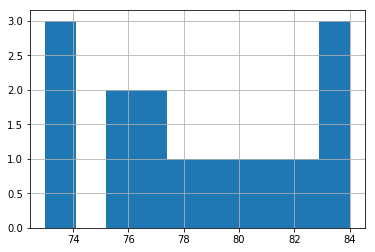

In [47]:
lakers.height_inches.hist();

In [48]:
lakers['height_z-score'] = (lakers.height_inches - lakers.height_inches.mean()) / lakers.height_inches.std(ddof = 0)
lakers

,player,salary,height_inches,deviation,squared_deviation,salary_z-score,height_z-score
0,LeBron James,37436858,80,2.957912e+07,8.749243e+14,2.877437,0.442963
1,Anthony Davis,27093019,82,1.923528e+07,3.699960e+14,1.871195,1.020742
2,Danny Green,14634146,78,6.776408e+06,4.591971e+13,0.659204,-0.134815
3,Kentavious Caldwell-Pope,8089282,77,2.315441e+05,5.361269e+10,0.022524,-0.423704
4,Avery Bradley,4767000,74,-3.090738e+06,9.552661e+12,-0.300665,-1.290372
5,JaVale McGee,4000000,84,-3.857738e+06,1.488214e+13,-0.375278,1.598520
6,DeMarcus Cousins,3500000,83,-4.357738e+06,1.898988e+13,-0.423918,1.309631
7,Quinn Cook,3000000,74,-4.857738e+06,2.359762e+13,-0.472558,-1.290372
8,Alex Caruso,2750000,77,-5.107738e+06,2.608899e+13,-0.496877,-0.423704
9,Jared Dudley,2564753,79,-5.292985e+06,2.801569e+13,-0.514898,0.154074


From this, we can see that the heights of players on the team show (relatively) less dispersion. While Lebron James' salary is nearly 3 standard deviations above the average salary, the tallest player is only about 1.6 standard deviations above average.

Further, we can see that the distributions of heights is much more symmetric, and does not have a tail to either side. At the same time, for this distribution, it is not really bell-shaped either, since we do not see a large number of players near the average height.

## Relative Standard Deviation (Coefficient of Variation)

$\text{CV} = \frac{\sigma}{\mu}$

How large is the standard deviation when compared to the mean? Useful for comparing the distribution of two variables, when they are measured on different scales.

Maybe this is skippable??

## Quartiles and Quantiles/Percentiles

We have already encountered a special case of quantiles and percentiles, in the form of the median. Recall that the median of a dataset is middle observation, if the observations are placed in ascending order. Another way to view this is that the median separates the lower half of the dataset from the upper half.

Instead of dividing a dataset into halves, **quartiles** divide a dataset into quarters. The **first quartile** separates the smallest quarter of observations from the highest three-quarters, the **second quartile**, aka the median, separates teh smallest half of observations from the largest half of observations, and the **third quartile** separates the smallest three-quarters from the largest quarter of observations.

In [49]:
lakers.salary.quantile(q = 0.25)

2564753.0

In [50]:
lakers.salary.quantile(q = 0.5)

3000000.0

In [51]:
lakers.salary.quantile(q = 0.75)

6428141.0

We can use the quantiles to find the **interquartile range**, which is defined as the distance from the first to the third quartile. In a way, it is a trimmed version of the range, which is not as sensitive to extreme values.

In [52]:
lakers.salary.quantile(q = 0.75) - lakers.salary.quantile(q = 0.25)

3863388.0

This tells us that the middle half of observations all fall into a range of width $3.8 million.

More generally, we can look at the quantiles or percentiles. The $n$th percentile separtes the lowest $n$% of observations from the rest. For example, the 90th percentile divides the lowest 90% of observations from the highest 10%. 

To find percentiles, we can use the quantile function from pandas.

In [53]:
lakers.salary.quantile(q = 0.1)

1996197.6

In [54]:
lakers.salary.quantile(q = 0.9)

22109469.799999997

Percentiles can be used to identify unusual observations, or to trim outliers from a data set.

If we want to understand how a variable is distributed, we have already seen how we can use a histogram. An alternative type of plot that we can use is a **boxplot** (aka **box-and-whiskers plot**). This type of plot displays a box which starts at the first quartile and extend to the third quartile, with the second quartile marked. It also has whiskers that extend to last observations contained within the **outlier boundaries**. 

These boundaries are (usually) defined as being at 1.5 times the interquartile range below the first quartile and above the third quartile. Any points outside of the outiler boundaries are plotted individually.

In [55]:
import seaborn as sns

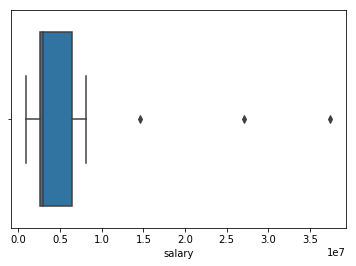

In [56]:
sns.boxplot(lakers.salary);

Boxplots are also good for comparing the distribution of a variable across two or more categories. For example, let's compare salaries for the Lakers to salaries for the Memphis Grizzlies.

In [57]:
lakers_grizzlies = pd.read_csv('../data/Lakers_Grizzlies.csv')

In [58]:
lakers_grizzlies

,player,salary,team
0,Gorgui Dieng,16229213,Grizzlies
1,Jonas Valančiūnas,16000000,Grizzlies
2,Justise Winslow,13000000,Grizzlies
3,Kyle Anderson,9073050,Grizzlies
4,Ja Morant,8730240,Grizzlies
5,Tyus Jones,8408000,Grizzlies
6,Josh Jackson,7059480,Grizzlies
7,Jaren Jackson,6927480,Grizzlies
8,Marko Guduric,2625000,Grizzlies
9,Brandon Clarke,2478840,Grizzlies


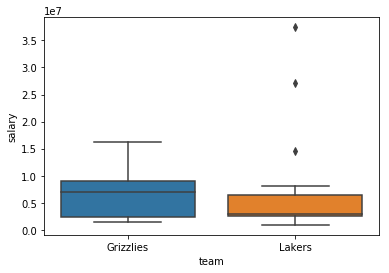

In [59]:
sns.boxplot(data = lakers_grizzlies, x = "team", y = "salary");

From this boxplot, we can see that the Grizzlies have a wider interquartile range and higher median salary with no points considered as outliers. This may be due in part to the NBA's salary cap, which limits the total payroll of each team. Since the Lakers have several extremely highly-compensated players, it leaves less money to go around to the remaining players.

In [60]:
lakers_grizzlies[lakers_grizzlies.team == 'Grizzlies'].salary.mean()

6972617.071428572

## Density Estimation

As we have more observations, we can use more bins when creating our histogram. At a certain point, it becomes too "spiky", and we lose out on the true picture. An alternative strategy is to smooth out the histogram using what's called kernel density estimation.

When creating a histogram, we are really performing **density estimation**. That is, we are trying to understand the **probability density function** which underlies our observed data.

When doing statistical analysis, we are usually assuming that our dataset is only a sample from some larger population. A probability density function describes how likely we are to see observations within a certain range. Since we are only looking at a sample, we can't know what the true probability density function looks like, but we can use a variety of techniques to estimate it.

We will now look at a dataset consisting of a sample 1000 home appriasal values from Nashville/Davidson County over 3 different years (3000 total observations).

In [86]:
nash_appraisal = pd.read_csv('../data/appraisal_sample.csv')

nash_appraisal.head()

One downside to a histogram is that it can be highly sensitive to the choice of number of bins.

Since this dataset has a handful of very large outliers, we will only look at home appraised at less than \$1,000,000.

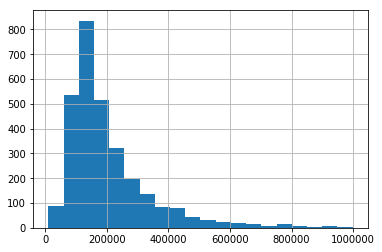

In [94]:
nash_appraisal[nash_appraisal.total_appr < 1000000].total_appr.hist(bins = 20);

As we increase the number of bins, we get more and more detail.

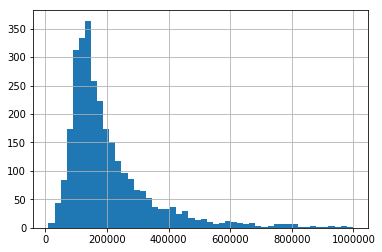

In [95]:
nash_appraisal[nash_appraisal.total_appr < 1000000].total_appr.hist(bins = 50);

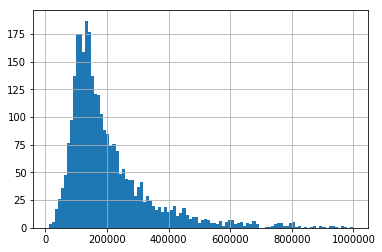

In [96]:
nash_appraisal[nash_appraisal.total_appr < 1000000].total_appr.hist(bins = 100);

But at a certain point, we are getting almost "too much" detail, and it is hard to know if we are actually seeing important aspects of the dataset, or are just seeing relics from the random sampling plus the binning process.

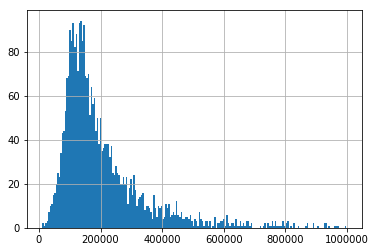

In [97]:
nash_appraisal[nash_appraisal.total_appr < 1000000].total_appr.hist(bins = 200);

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

As we have seen, the histogram is extremely sensitive to the choice of bins. As an alternative, a Kernel Density Estimation is a way to "smooth" a histogram. One way we can get a density estimate by using the `distplot` function from `seaborn`. This will create a histogram with a kde superimposed.

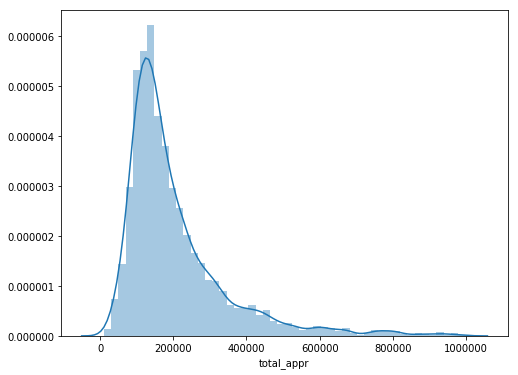

In [98]:
fig, ax = plt.subplots(figsize = (8,6))
sns.distplot(nash_appraisal[nash_appraisal.total_appr < 1000000].total_appr);

If we want just the kernel density estimation, we can use the `kdeplot` instead. Kernel density estimation works by looking at the density of observations within a certain "bandwidth" around each point. We can adjust the bandwidth to see the effect on the density estimation:

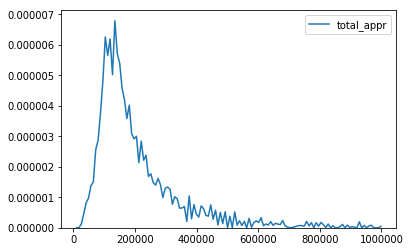

In [104]:
sns.kdeplot(nash_appraisal[nash_appraisal.total_appr < 1000000].total_appr, bw = 100);

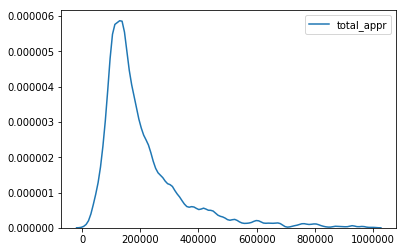

In [106]:
sns.kdeplot(nash_appraisal[nash_appraisal.total_appr < 1000000].total_appr, bw = 10000);

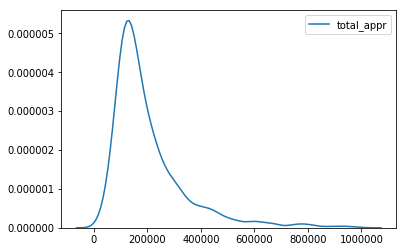

In [108]:
sns.kdeplot(nash_appraisal[nash_appraisal.total_appr < 1000000].total_appr, bw = 25000);

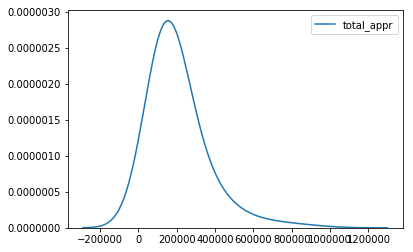

In [109]:
sns.kdeplot(nash_appraisal[nash_appraisal.total_appr < 1000000].total_appr, bw = 100000);

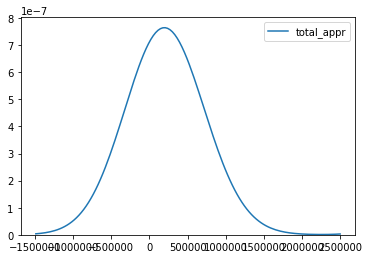

In [110]:
sns.kdeplot(nash_appraisal[nash_appraisal.total_appr < 1000000].total_appr, bw = 500000);

By default, `kdeplot` will use a method to make a guess at a good bandwidth.

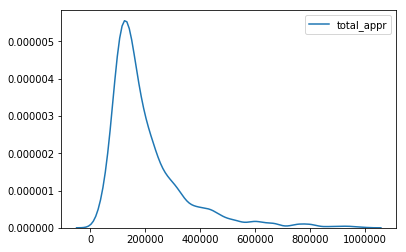

In [114]:
sns.kdeplot(nash_appraisal[nash_appraisal.total_appr < 1000000].total_appr);

## Violin Plots?

Need to have KDE prior to this. Plus, it is a generalization of box plots, so could also be good to have.

What dataset to use here?

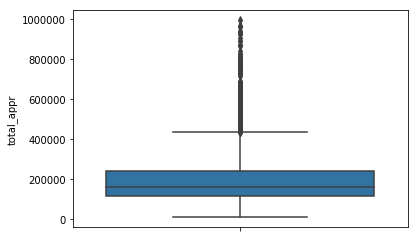

In [126]:
sns.boxplot(data = nash_appraisal[nash_appraisal.total_appr < 1000000], 
               y = 'total_appr');

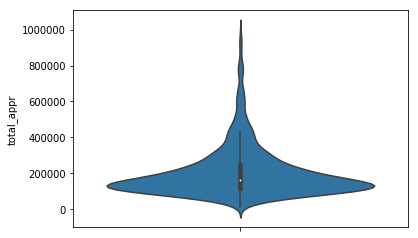

In [122]:
sns.violinplot(data = nash_appraisal[nash_appraisal.total_appr < 1000000], 
               y = 'total_appr');

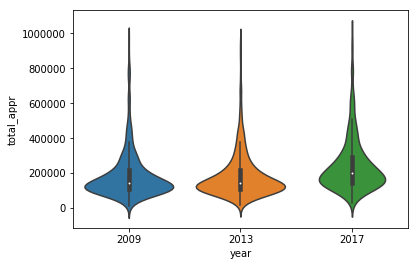

In [119]:
sns.violinplot(data = nash_appraisal[nash_appraisal.total_appr < 1000000], 
               x = 'year', y = 'total_appr');

In [127]:
nash_appraisal_2017 = nash_appraisal[nash_appraisal.year == 2017]

In [128]:
mu = nash_appraisal_2017.total_appr.mean()
sigma = nash_appraisal_2017.total_appr.std()

In [145]:
nash_appraisal_2017['z_score'] = (nash_appraisal_2017.total_appr - mu) / sigma

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
nash_appraisal_2017[nash_appraisal_2017.z_score > 3].sort_values('total_appr', ascending = False)

,council_district,total_appr,finished_area,year,z-score,z_score
2918,34,2729000.0,10161.79980,2017,10.688041,10.688041
2954,25,2365400.0,8020.25000,2017,9.111466,9.111466
2118,34,2340200.0,8959.01465,2017,9.002199,9.002199
2680,23,1861400.0,5702.00000,2017,6.926115,6.926115
2255,23,1704600.0,5411.00000,2017,6.246228,6.246228
2896,34,1523500.0,5482.00000,2017,5.460976,5.460976
2758,34,1382600.0,5167.50000,2017,4.850032,4.850032
2456,34,1344700.0,8107.50000,2017,4.685697,4.685697
2441,34,1321200.0,6057.50000,2017,4.583800,4.583800
2764,25,1273500.0,5584.81982,2017,4.376972,4.376972
